In [6]:
import os, sys
import numpy as np
import cv2
import imutils
from collections import deque
from matplotlib import image as mpimg

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os,sys

In [11]:
os.getcwd()

'C:\\Users\\wsutt\\Desktop\\files\\ppd'

In [2]:
from ppd.track_a import *

In [3]:
imgfn = "ppd/pic48.jpg"

In [15]:
mypath = os.getcwd() + "\\ppd"
mypath

'C:\\Users\\wsutt\\Desktop\\files\\ppd\\ppd'

In [51]:
img_fns = batch_files(mypath)

In [125]:
img_fns = batch_files(os.getcwd() + '\\ppd')

['pic1.jpg', 'pic2.jpg', 'pic3.jpg', 'pic4.jpg', 'pic5.jpg', 'pic6.jpg', 'pic7.jpg', 'pic8.jpg', 'pic9.jpg', 'pic10.jpg', 'pic11.jpg', 'pic12.jpg', 'pic13.jpg', 'pic14.jpg', 'pic15.jpg', 'pic16.jpg', 'pic17.jpg', 'pic18.jpg', 'pic19.jpg', 'pic20.jpg', 'pic21.jpg', 'pic22.jpg', 'pic23.jpg', 'pic24.jpg', 'pic25.jpg', 'pic26.jpg', 'pic27.jpg', 'pic28.jpg', 'pic29.jpg', 'pic30.jpg', 'pic31.jpg', 'pic32.jpg', 'pic33.jpg', 'pic34.jpg', 'pic35.jpg', 'pic36.jpg', 'pic37.jpg', 'pic38.jpg', 'pic39.jpg', 'pic40.jpg', 'pic41.jpg', 'pic42.jpg', 'pic43.jpg', 'pic44.jpg', 'pic45.jpg', 'pic46.jpg', 'pic47.jpg', 'pic48.jpg', 'pic49.jpg', 'pic50.jpg', 'pic51.jpg', 'pic52.jpg', 'pic53.jpg', 'pic54.jpg', 'pic55.jpg', 'pic56.jpg', 'pic57.jpg', 'pic58.jpg', 'pic59.jpg', 'pic60.jpg', 'pic61.jpg', 'pic62.jpg', 'pic63.jpg', 'pic64.jpg', 'pic65.jpg', 'pic66.jpg', 'pic67.jpg', 'pic68.jpg', 'pic69.jpg', 'pic70.jpg', 'pic71.jpg', 'pic72.jpg', 'pic73.jpg', 'pic74.jpg', 'pic75.jpg']


In [20]:
trackeds = batch_track(img_fns)

In [45]:
def filter_track(track_p, **kwargs):
    
    min_radius = kwargs.get('min_radius', False)
    
    if track_p[0] is not None:
        if bool(min_radius):
            if track_p[1] >= min_radius:
                return True
        else:
            return True
    return False

tests = [((1,1),12), (None,13)]

print filter_track(tests[0])
print filter_track(tests[1])
print filter_track(tests[1], min_radius = 15)

True
False
False


In [59]:
from ppd.track_a import *

In [53]:
bad_frames= filter(lambda e: filter_track(e[1], min_radius = 12),
                   enumerate(trackeds) )

bad_frames_ind = map(lambda i: i[0] ,bad_frames)

bad_imgs = [ img_fns[i] for i in bad_frames_ind ]

print len(img_fns)
print len(bad_frames)
print bad_frames_ind[:4]

75
54
[3, 4, 5, 6]


In [63]:
masks = batch_mask(bad_imgs)

In [65]:
len(masks)

54

In [121]:
inp_masks = masks[:3]
inp_imgs = bad_imgs[:3]

d_on, d_off = {}, {}
for clr in 'bgr':
    d_on[clr]= []
    d_off[clr]= []

for mask_img in zip(inp_masks,inp_imgs):

    mask,img = mask_img[0], mask_img[1]
    
    on_img = px_filter(255,img,mask)
    off_img = px_filter(0,img,mask)

    on_pxs = px3clr_3px1clr(on_img)
    off_pxs = px3clr_3px1clr(off_img)
    
    for i,clr in enumerate('bgr'):
        d_on[clr].extend(on_pxs[i])
        d_off[clr].extend(off_pxs[i])
        

In [115]:
len(d_on['r'])

1800

In [103]:
#for clr in 'bgr':
#    d_on[clr] =  [item for sub in d_on[clr] for item in sub]
#    d_off[clr] = [item for sub in d_off[clr] for item in sub]

In [122]:
list_d_on = []
list_d_off = []
for k in 'bgr':
    list_d_on.append( d_on[k] )
    list_d_off.append( d_off[k] )

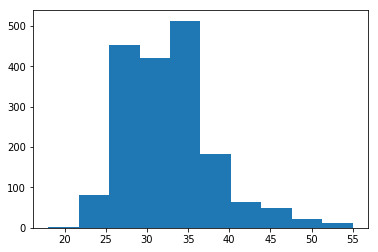

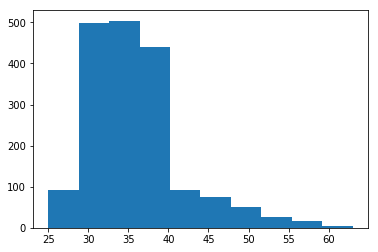

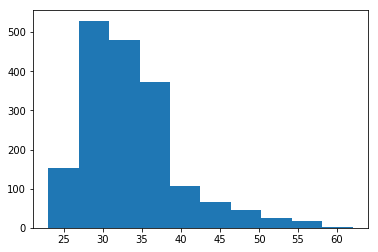

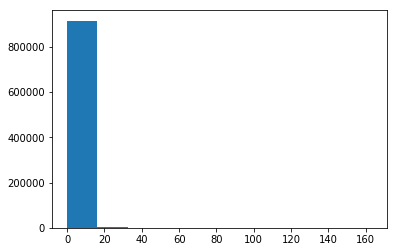

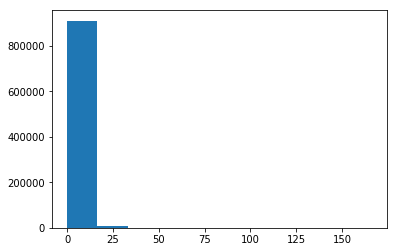

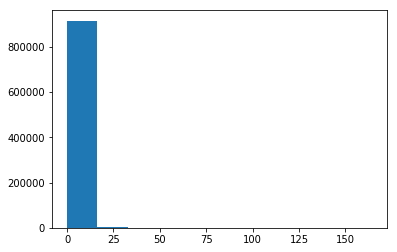

In [123]:
multi_hist(list_d_on)
multi_hist(list_d_off)